### 워드클라우드 - 어버이날 선물

In [27]:
import re, nltk
from konlpy.tag import Okt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

- 한글 텍스트 전처리

In [11]:
with open('data/어버이날 선물.txt') as f:
    text = f.read()

In [12]:
okt = Okt()
tokens = okt.nouns(text)        # 문장에서 명사 추출
tokens[:10]

['어버이날', '선물', '추천', '탄생석', '골드', '카네이션', '추천', '카네이션', '자체', '전체']

In [13]:
# 영문자, 숫자 제거
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:        # 빈 문자열이면 False, 즉 빈 문자열이 아닌 것만 추가
        new_tokens.append(item)

- 불용어 정리
    - 아래 두 문장을 만족할 때 까지 반복

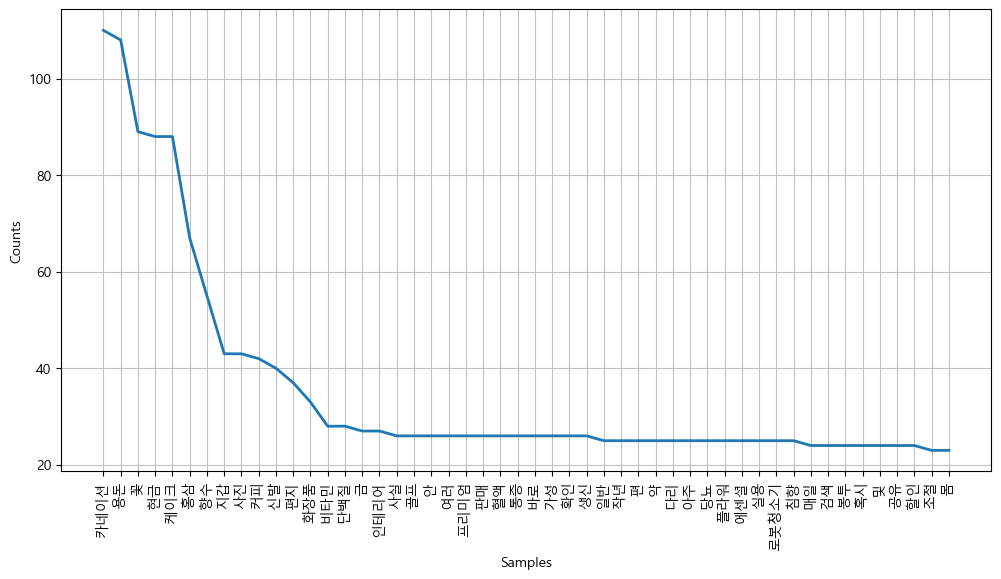

In [23]:
gift = nltk.Text(new_tokens, name='어버이날 선물')
plt.figure(figsize=(12,6))
gift.plot(50);

In [22]:
stoptext = """
    선물 추천 어버이날 부모님 것 수 건강 제품 제 이 저 식품 가격 참고 도움
    때 더 요 분 등 사용 스 활동 파트너 수수료 요즘 생각 세트 제공 위 고민
    구매 마음 박스 상품 기 향 거 한번 정액 이미지 존재 링크 기능 아래 일환 정말
    선택 돈 운동 쿠팡 가지 답변 관리 준비 브랜드 부담 지금 디자인 양제 포스팅
    하나 가장 인기 저희 방향 걸 발 의미 정도 날 채택 정보 시간 안마 카드 관절
    제작 나이 포장 오일 해 건 질문 이번 이상 효과 콘드 이친 노블 어머니 아버지
    일 주문 자 엄마 사 제일 글 직접 집 후기 다른 미국 때문 피 배송 평소 구성 좀
    드릴 번 보충 그 용 전 관련 마사지 꼭 연골 아버님 도 석고 호랑이 아빠 보시 최고
    성분 구 무릎 조금 고려 개 라면 더욱 통해 가요 달 꽃다발 배 나 중 용품 사람
    명품 순환 걷기 섭취 우리 경우 단
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['탄생석', '골드', '카네이션', '카네이션', '자체', '전체', '도금', '완전', '금', '카네이션']

- 워드 클라우드 그리기

In [24]:
data = gift.vocab().most_common(5)
data

[('카네이션', 110), ('용돈', 108), ('꽃', 89), ('현금', 88), ('케이크', 88)]

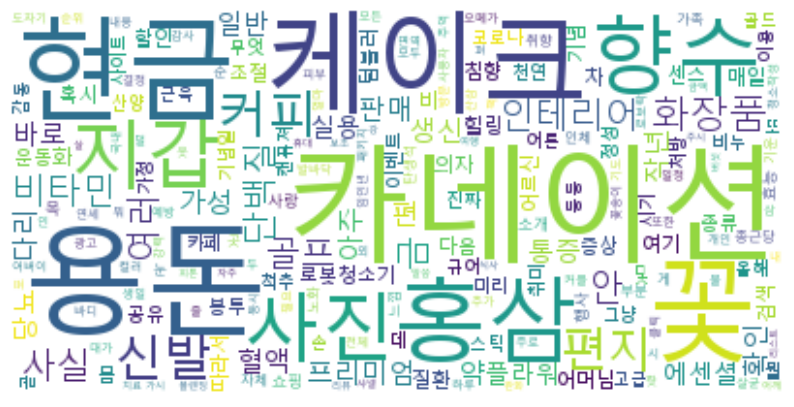

In [25]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf'
    ).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

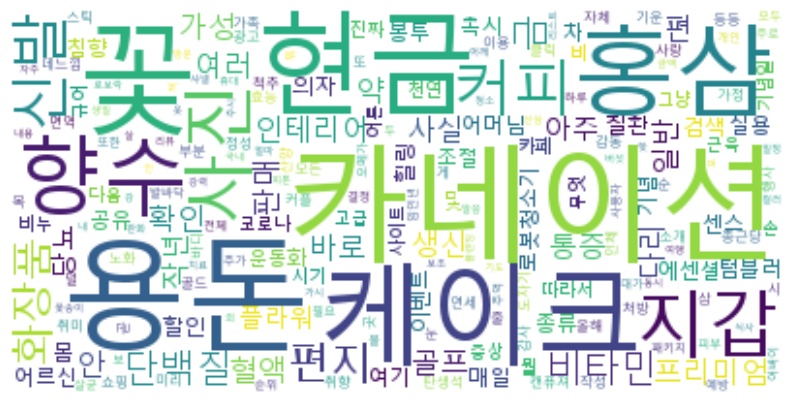

In [26]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2
    ).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

- 그림 위에 표시

In [28]:
mask = np.array(Image.open('data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

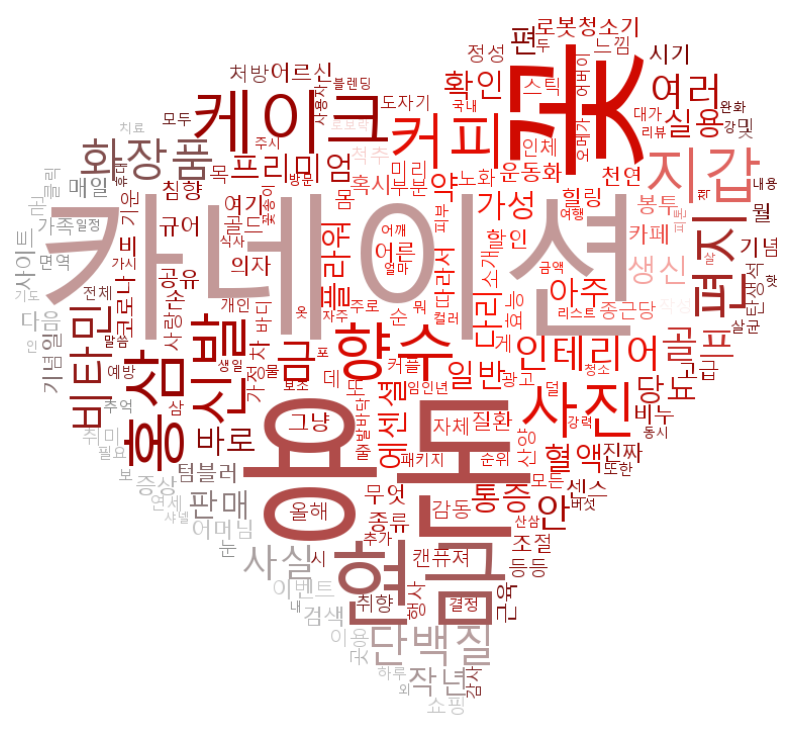

In [35]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask
    ).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');